# Autolib (Blue Car sharing) Project

## Defining The Question



### a) Specifying the Data Analytic Question

Given two randomly chosen Postal Codes, is the average number of Bluecars taken during weekdays different in the two Postal Codes?

Null Hypothesis(Ho): μ(taken weekday|PC1) = μ(taken weekday|PC2)

Alternate Hypothesis(Ha): μ(taken weekday|PC1) ≠ μ(taken weekday|PC2)

where μ is the mean number of cars taken during weekdays, PC1 and PC2 are the two randomly chosen postcodes from the dataset.

### b) Defining the Metric for Success

Based on the data, either accepting or rejecting the null hypothesis.

### c) Understanding the context 

Paris, the capital of France has about 837 zip codes. The postal codes vary in area with the largest being 75012 at 16.4 km² and the smallest being 75002 at 1.012 km². The population also follows a similar trend with the most populated being zip code 75015 at about 233,106. Conversely, the most densely populated zip code is 75011 at about 41,544 / km². Choosing two random postal codes as our samples from the data, we shall perform a hypothesis test to give us better insights into the data.

## Data Loading & Cleaning

>Data loading and visual checking:

In [288]:
#Importing the mostly used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [279]:
#loading the dataset
df = pd.read_csv('autolib_daily_events_postal_code.csv')


In [280]:
# Determining the no. of records in our dataset
#
df.shape

(16085, 13)

In [281]:
#viewing the data (top)
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,01/01/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,01/02/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,01/03/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,01/04/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,01/05/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [282]:
#viewing the data (bottom)
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [283]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

>Data Cleaning:

In [284]:
#dropping unnecessary columns
#df.drop(['n_daily_data_points','dayOfWeek','day_type'])
df.drop(df.iloc[:, 2:5], inplace = True, axis = 1) 
df.drop(df.iloc[:, 3:], inplace = True, axis = 1) 
df.head()


,Postal code,date,BlueCars_taken_sum
0,75001,01/01/2018,110
1,75001,01/02/2018,98
2,75001,01/03/2018,138
3,75001,01/04/2018,104
4,75001,01/05/2018,114


In [285]:
#tidying the column names
df.columns = df.columns.str.lower().str.replace(' ','_')
df

,postal_code,date,bluecars_taken_sum
0,75001,01/01/2018,110
1,75001,01/02/2018,98
2,75001,01/03/2018,138
3,75001,01/04/2018,104
4,75001,01/05/2018,114
...,...,...,...
16080,95880,6/15/2018,15
16081,95880,6/16/2018,19
16082,95880,6/17/2018,33
16083,95880,6/18/2018,11


In [286]:
#converting the date to datetime and making it an index
#set date as index
df.set_index(df.date, drop=True,inplace=True)
df.head()

#convert the index to datetimeIndex
df.index = pd.to_datetime(df.index)
df

#drop date column
df.drop('date', axis=1, inplace=True)
df.head()

,postal_code,bluecars_taken_sum
date,,
2018-01-01,75001,110
2018-01-02,75001,98
2018-01-03,75001,138
2018-01-04,75001,104
2018-01-05,75001,114


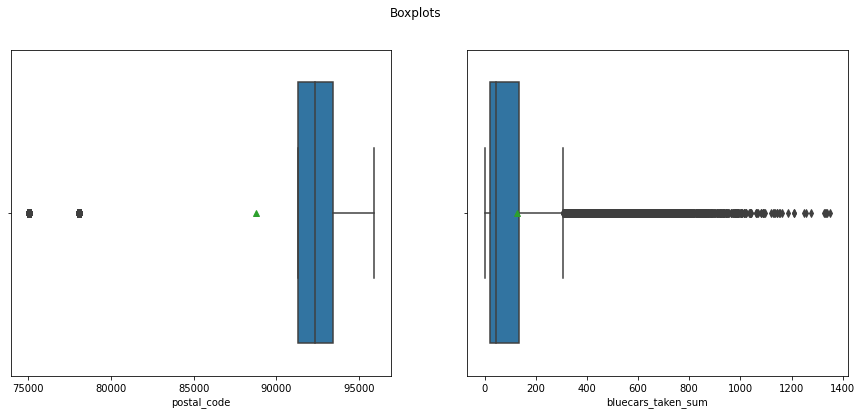

In [287]:
# Checking for Outliers & Anomalies
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))
fig.suptitle('Boxplots')
sns.boxplot(x = df['postal_code'], ax=ax1, showmeans = True)
sns.boxplot(x = df['bluecars_taken_sum'], ax=ax2, showmeans = True)
plt.show()


> From external validation, the values considered outliers in the Postal Code are valid codes (just a difference in the number of digits that is causing them to appear so), additionally for the case of blue cars taken, it is possible to have a high number too. With that in mind, we shall not exclude them (No dropping of records). An additional check will be done when visually looking at the data distribution.

In [289]:
# Identifying the Missing Data
#
df.isnull().any()

postal_code           False
bluecars_taken_sum    False
dtype: bool

In [290]:
#Subset the data to only 2 randomly selected Postal Codes:
#1st creating an array of postal codes and sorting them
codes = np.sort(df.postal_code.unique())
codes

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [291]:
#Subset the data to only 2 randomly selected Postal Codes:
import random
#setting a seed so that all the code can be run and give the same results
random.seed(0)
print ("Choosing 2 random Postal Codes from the dataset",random.sample(list(codes), k=2))

Choosing 2 random Postal Codes from the dataset [92320, 94450]


In [292]:
#Subset the data to only the two randomly selected Postal Codes 92320 and 94450
PC1 = 92320
PC2 = 94450
df_blue = df.loc[(df['postal_code'] == PC1) | (df['postal_code'] == PC2)] 
df_blue


,postal_code,bluecars_taken_sum
date,,
2018-01-01,92320,64
2018-01-02,92320,51
2018-01-03,92320,51
2018-01-04,92320,44
2018-01-05,92320,78
...,...,...
2018-06-15,94450,10
2018-06-16,94450,21
2018-06-17,94450,22


## Univariate Summaries

In [293]:
# Ploting the Univariate summaries and recording our observations
#
#general statistics of the numerical data
df_blue.describe()

,postal_code,bluecars_taken_sum
count,312.000000,312.000000
mean,93385.000000,38.448718
std,1066.710844,25.741928
min,92320.000000,0.000000
25%,92320.000000,14.750000
50%,93385.000000,33.000000
75%,94450.000000,61.000000
max,94450.000000,97.000000


In [294]:
#Number of unique records of blue cars taken in the 2 post codes
print(f'Blue Cars Taken: {df_blue.bluecars_taken_sum.nunique()}')


Blue Cars Taken: 78


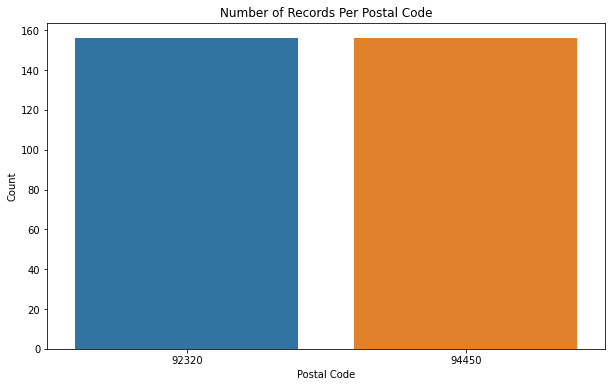

In [295]:
#count plot
plt.figure(figsize=(10,6))
sns.countplot(x = 'postal_code', data=df_blue)
plt.title('Number of Records Per Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Count')
plt.show()



In [296]:
#Numerical Count of records per postal code
df_blue['postal_code'].value_counts()

94450    156
92320    156
Name: postal_code, dtype: int64

In [297]:
#Measures of central tendency and dispersion
#Blue cars taken in 92320 and 94450
print(f'Min: {df_blue.bluecars_taken_sum.min()}')
print(f'Q1: {df_blue.bluecars_taken_sum.quantile(.25)}')
print(f'Q2: {df_blue.bluecars_taken_sum.quantile(.50)}')
print(f'Q3: {df_blue.bluecars_taken_sum.quantile(.75)}')
print(f'Max: {df_blue.bluecars_taken_sum.max()}')
print('*'*15)

print(f'Mean: {df_blue.bluecars_taken_sum.mean()}')
print(f'Median: {df_blue.bluecars_taken_sum.median()}')
print(f'Mode: {df_blue.bluecars_taken_sum.mode().values[0]}')
print('*'*15)

print(f'Skew: {df_blue.bluecars_taken_sum.skew()}')
print(f'Kurtosis: {df_blue.bluecars_taken_sum.kurt()}')

Min: 0
Q1: 14.75
Q2: 33.0
Q3: 61.0
Max: 97
***************
Mean: 38.44871794871795
Median: 33.0
Mode: 12
***************
Skew: 0.3259266196566025
Kurtosis: -1.3111552266643625


> skewness between -0.5 to 0.5 (about 0.33 in this case) then it means tha data is fairly symmetrical.

> The values of kurtosis on the otherhand, indicate that the distribution is light-tailed (lack of outliers). This is because the extreme values are less than that of the normal distribution meaning it is Platykurtic.

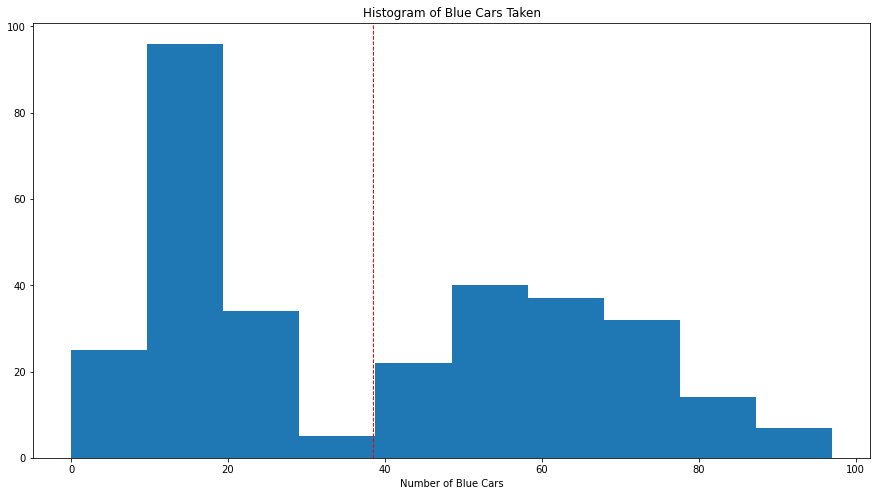

In [298]:
#Visual of the distribution of the records of blue cars taken (Approximately normal) with the mean (redline)

plt.figure(figsize=(15,8))
plt.hist(df_blue['bluecars_taken_sum'])
plt.axvline(df_blue.bluecars_taken_sum.mean(), color='r', linestyle='dashed', linewidth=1)
plt.title('Histogram of Blue Cars Taken')
plt.xlabel('Number of Blue Cars')
plt.show()

> The above graph shows that the sample data appears to be bimodal in nature (distribution).

## Bivariate Summaries

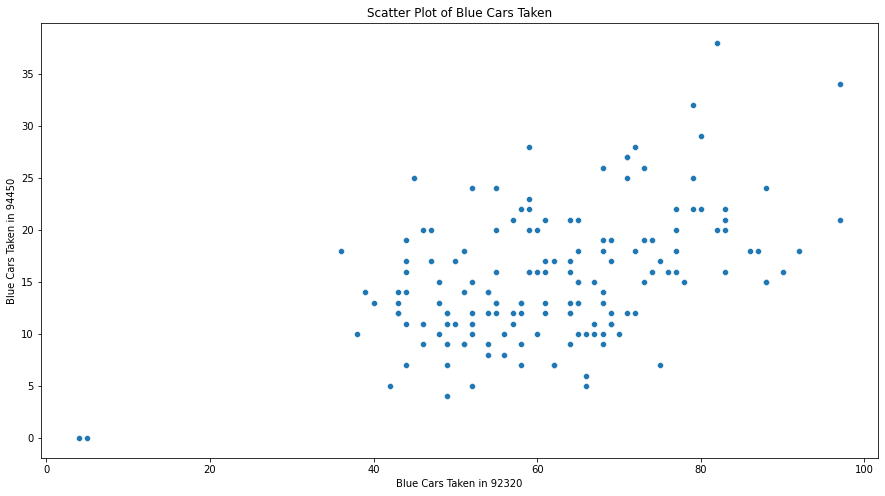

In [304]:
#grouping records by zip code to compare the relationship between them in regards to blue cars taken
df_p1 = df_blue[df_blue['postal_code']== PC1]
df_p2 = df_blue[df_blue['postal_code']== PC2]

#plotting the scatter plot to show relationship between the 2 postal codes
plt.figure(figsize=(15,8))
sns.scatterplot(x = df_p1['bluecars_taken_sum'], y = df_p2['bluecars_taken_sum'])
plt.title('Scatter Plot of Blue Cars Taken')
plt.xlabel('Blue Cars Taken in 92320')
plt.ylabel('Blue Cars Taken in 94450')
plt.show()

> As can be seen above the relationship seems like a positive linear one. As more cars are taken in Postal Code 92320, so too are they taken in 94450. Observed is also the two outliers near the zero mark, this may point to an issue that could be further explored to reveal possible reasons. 

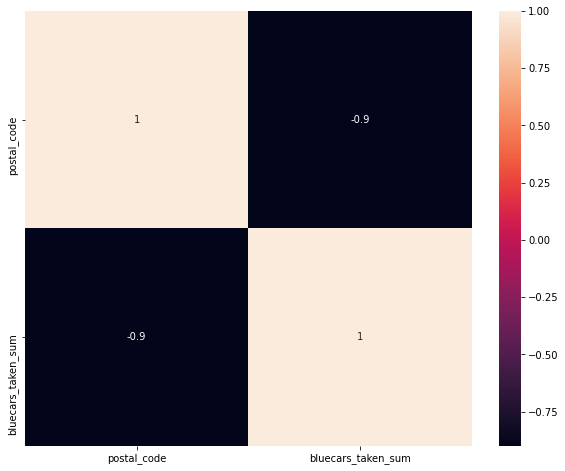

In [188]:
#checking correlations
plt.figure(figsize=(10,8))
sns.heatmap(df_blue.corr(),annot=True)
plt.show()

> The above figure confirms that theres a high negative correlation between postal code and the number of blue cars taken.

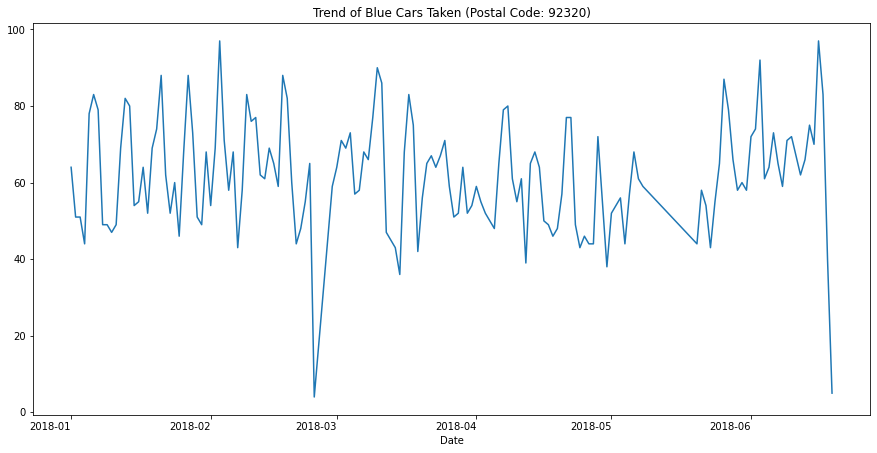

In [189]:
#plotting the blue cars taken from 92320
plt.figure(figsize=(15,8))
df_p1['bluecars_taken_sum'].plot()
plt.title('Trend of Blue Cars Taken (Postal Code: 92320)')
plt.xlabel('Date')
plt.xticks( rotation='horizontal')
plt.show()

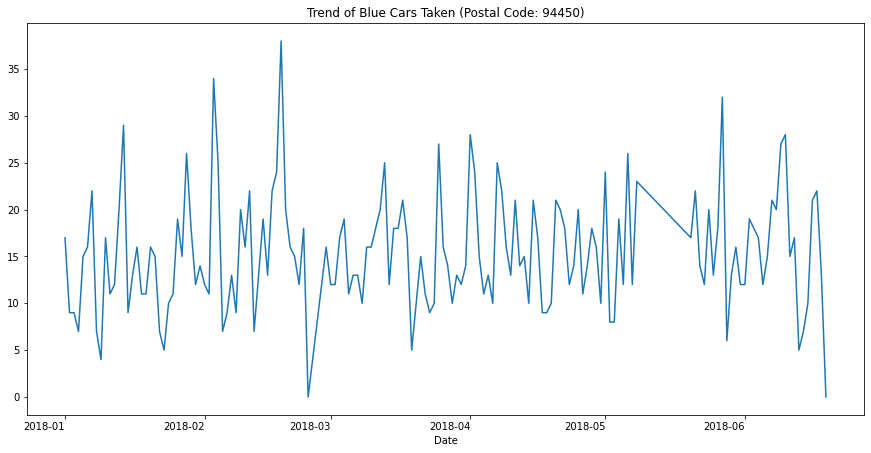

In [190]:
#plotting the blue cars taken from 94450 
plt.figure(figsize=(15,8))
df_p2['bluecars_taken_sum'].plot()
plt.title('Trend of Blue Cars Taken (Postal Code: 94450)')
plt.xlabel('Date')
plt.xticks( rotation='horizontal')
plt.show()

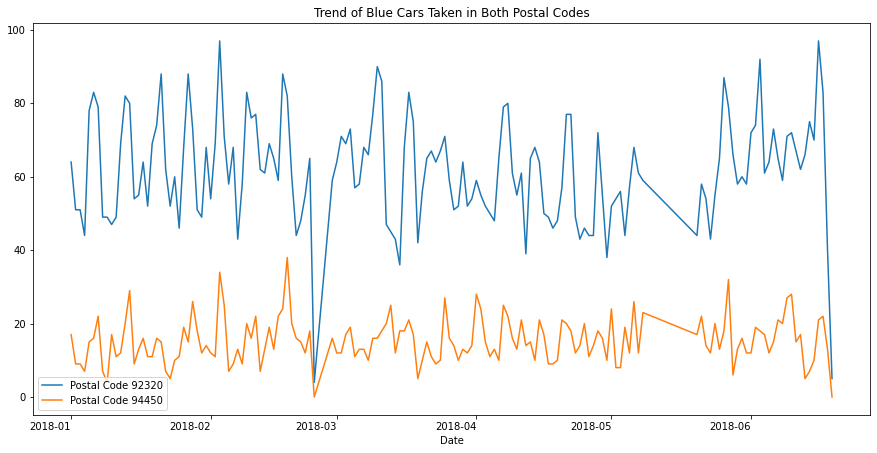

In [191]:
#plotting both postal codes together to compare trends
plt.figure(figsize=(15,8))
ax = df_p1['bluecars_taken_sum'].plot()
df_p2['bluecars_taken_sum'].plot(ax=ax)
plt.title('Trend of Blue Cars Taken in Both Postal Codes')
plt.xlabel('Date')
plt.xticks( rotation='horizontal')
plt.legend(['Postal Code 92320', 'Postal Code 94450'], loc='lower left');
plt.show()

> It is clear that both of the subsets of the data follow an almost identical trend with interesting occurences observed at the two major dips (just before March 2018 and after June of the same year). Though in postal code 92320 the dips are grossly exaggerated.

> Another thing to note is that we can see that Postal Code 92320 has clearly a higher (different) number of cars taken compared to 94450 but this also includes the weekend. This implies we can reject the null hypothesis and state that the alternate is true but this shall be checked and proven using statistical methods in the next section.

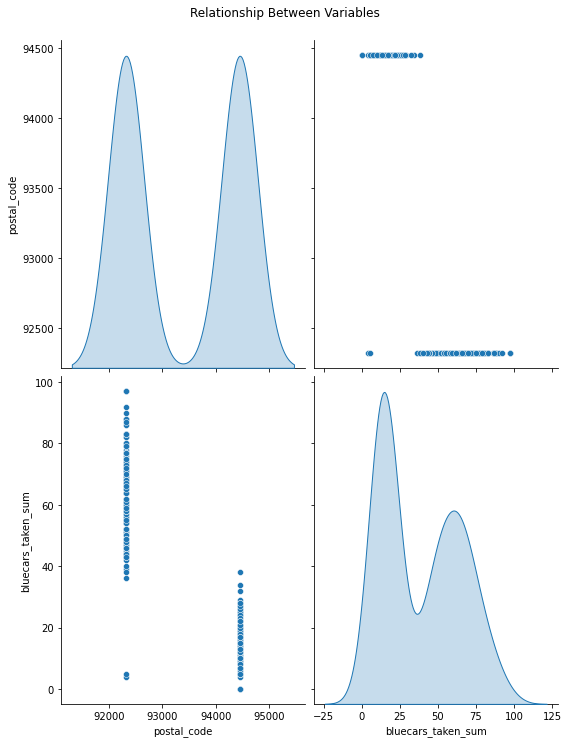

In [214]:
#Pair plot(summary of relationships)
pp = sns.pairplot(df_blue, diag_kind='kde', height=5, aspect=0.8, )
pp.fig.suptitle("Relationship Between Variables",  y=1.03)
plt.show()

> The above pairplot assists us in explaining the reason for the data being bimodal as previously highlighted. Observing the bottom right plot, we can see because we have two postal codes the data is also segmented into two.

## Hypothesis Testing

> To carry out the hypothesis test we need only weekdays in our data and the two Postal Codes. Since the data was already selected using the 2 random codes we generated, in the following steps the data shall be subset to only include weekdays.

In [223]:
#Subset the data to weekdays only
df_weekday = df_blue[df_blue.index.weekday <= 4]
df_weekday.head()

,postal_code,bluecars_taken_sum
date,,
2018-01-01,92320,64
2018-01-02,92320,51
2018-01-03,92320,51
2018-01-04,92320,44
2018-01-05,92320,78


In [225]:
#subset the new df to the indivdual postal codes to allow for the hypothesis testing
#grouping records by zip code to compare the relationship between them in regards to blue cars taken
dfw_p1 = df_weekday[df_weekday['postal_code']== PC1]
dfw_p2 = df_weekday[df_weekday['postal_code']== PC2]


In [226]:
#checking new df of 92320
dfw_p1.head()

,postal_code,bluecars_taken_sum
date,,
2018-01-01,92320,64
2018-01-02,92320,51
2018-01-03,92320,51
2018-01-04,92320,44
2018-01-05,92320,78


In [228]:
#checking the size
print(dfw_p1.shape)

(112, 2)


In [227]:
#checking new df of 94450
dfw_p2.head()

,postal_code,bluecars_taken_sum
date,,
2018-01-01,94450,17
2018-01-02,94450,9
2018-01-03,94450,9
2018-01-04,94450,7
2018-01-05,94450,15


In [229]:
#checking the size
print(dfw_p2.shape)

(112, 2)


> The kind of test and statistic calculated is based on some assumptions such as sample size (n = 112 as above) and distribution which we'll check next

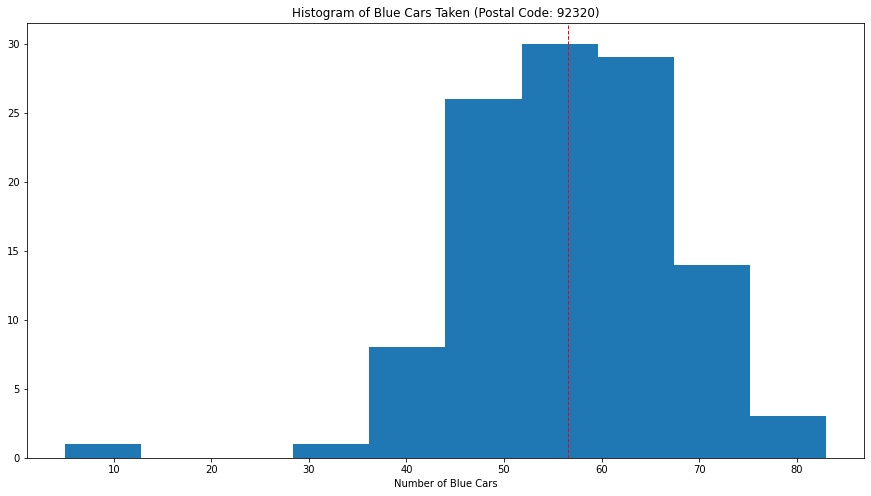

In [230]:
#checking the distributions:
#92320:
plt.figure(figsize=(15,8))
plt.hist(dfw_p1['bluecars_taken_sum'])
plt.axvline(dfw_p1.bluecars_taken_sum.mean(), color='r', linestyle='dashed', linewidth=1)
plt.title('Histogram of Blue Cars Taken (Postal Code: 92320)')
plt.xlabel('Number of Blue Cars')
plt.show()

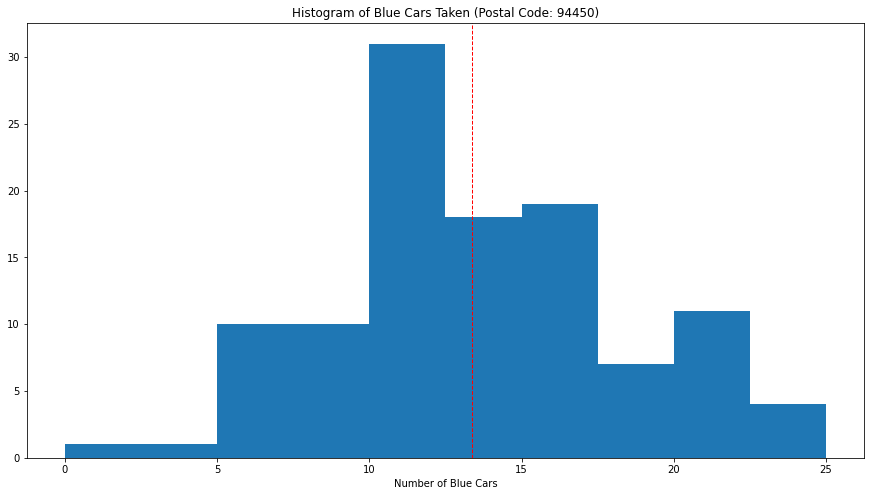

In [231]:
#checking the distributions:
#94450:
plt.figure(figsize=(15,8))
plt.hist(dfw_p2['bluecars_taken_sum'])
plt.axvline(dfw_p2.bluecars_taken_sum.mean(), color='r', linestyle='dashed', linewidth=1)
plt.title('Histogram of Blue Cars Taken (Postal Code: 94450)')
plt.xlabel('Number of Blue Cars')
plt.show()

> As can be seen above both samples are approximately normally distributed which allows as to choose between a t-test and a z-test to test our hypothesis.

> But given that the sample size is 112 (n = 112) way bigger than 30 (the recommended limit) for the t-test, we shall then carry out a Z-test. Additionally, since we're checking for change of any kind (positive or negative) then we shall do a two tail test. Therefore, for this particular problem we are going to do a **two-tailed Z test**.

> Significance chosen for the test is 5%, i.e. α = 0.05

In [260]:
#Carrying out the two-tailed Z test:

from scipy import stats
from statsmodels.stats import weightstats as stests

#given the null as true up until this point then mean_PC1 - mean_PC2 = 0 (value in the ztest code that follows)

ztest ,pval = stests.ztest(dfw_p1['bluecars_taken_sum'], x2=dfw_p2['bluecars_taken_sum'], value=0,alternative='two-sided')
print(float(pval))

#setting the significance level of 0.05
alpha = 0.05 
if pval < alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


In [259]:
#Just to confirm the above test we can check it against a Two-Sample T-test (Independents test),
#Since our sample size is considerably big the result should closely resemble the Z-test above

from scipy.stats import ttest_ind

dfw_p1_mean = np.mean(dfw_p1['bluecars_taken_sum'])
dfw_p2_mean = np.mean(dfw_p2['bluecars_taken_sum'])
print("92320 mean blue car taken:",dfw_p1_mean)
print("94450 mean blue car taken:",dfw_p2_mean)
print('*'*45)
print('')

dfw_p1_std = np.std(dfw_p1['bluecars_taken_sum'])
dfw_p2_std = np.std(dfw_p2['bluecars_taken_sum'])
print("92320 standard deviation of blue car taken:",dfw_p1_std)
print("92320 standard deviation of blue car taken:",dfw_p2_std)
print('*'*62)
print('')

#setting the significance level of 0.05
alpha = 0.05 
ttest,pval = ttest_ind(dfw_p1['bluecars_taken_sum'],dfw_p2['bluecars_taken_sum'])
print("p-value",pval)
if pval < alpha:
  print("Reject the Null hypothesis")
else:
  print("Accept the null hypothesis")

92320 mean blue car taken: 56.607142857142854
94450 mean blue car taken: 13.357142857142858
*********************************************

92320 standard deviation of blue car taken: 10.77394106733692
92320 standard deviation of blue car taken: 4.735611935976519
**************************************************************

p-value 1.0675906012288166e-100
Reject the Null hypothesis


The above Z-test which was then counter checked against a Two Sample T-Test resulted in a p-value < 0.05 (the chosen significance level for this test) which means that the test was significant. Meaning that we can reject the Null hypothesis in this case which was stating that there was no difference between the mean number of blue cars taken in the different postal codes (2 random ones picked for this test). We therefore accept the alternate hypothesis that there's a significant difference in the mean number of blue cars taken in the two postal codes (92320 and 94450).